<a href="https://colab.research.google.com/github/twyeh/AI-in-education/blob/main/01_%E6%A8%99%E6%BA%96%E7%9A%84_Fully_Connected_(Dense)_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### 1. 讀入 MNSIT 數據集

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 你也可以讀入 Fasion 版的 MNIST

In [ ]:
# from tensorflow.keras.datasets import fashion_mnist
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容 (非執行必要)

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
n = 9487

In [ ]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[n]

1

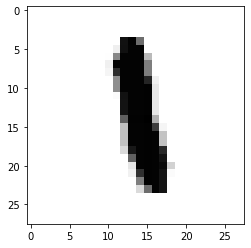

In [ ]:
plt.imshow(x_train[n], cmap='Greys')

### 3. 資料整理

先看個範例, 因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [ ]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 4. step 1: 打造神經網路

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(100, input_dim=784, activation='relu'))

In [ ]:
model.add(Dense(100, activation='relu'))

In [ ]:
model.add(Dense(10, activation='softmax'))

#### 組裝我們的神經網路

In [ ]:
model.compile(loss='mse', optimizer=SGD(lr=0.087),
              metrics=['accuracy'])

/Users/yenlung/anaconda3/envs/tf2-py38/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


#### 欣賞我們的作品

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


### 5. step 2: 訓練

In [ ]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 9s 11ms/step - loss: 0.0851 - accuracy: 0.3217
Epoch 2/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0591 - accuracy: 0.6546
Epoch 3/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0333 - accuracy: 0.8142
Epoch 4/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0236 - accuracy: 0.8616
Epoch 5/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0197 - accuracy: 0.8818
Epoch 6/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0176 - accuracy: 0.8914
Epoch 7/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0162 - accuracy: 0.8992
Epoch 8/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0153 - accuracy: 0.9047
Epoch 9/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0145 - accuracy: 0.9093
Epoch 10/20
600/600 [==============================] - 7s 12ms/step - loss: 0.0139 - accura

### 6. step 3: 預測 (testing)

In [ ]:
predict = model.predict_classes(x_test)

神經網路預測是: 6


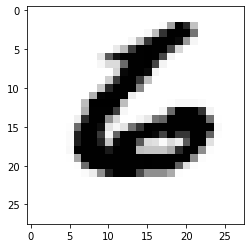

In [ ]:
n = 9999

print('神經網路預測是:', predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

### 7. 儲存我們的 model

In [ ]:
model.save("my_nn.h5")

In [ ]:
import tensorflow as tf

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'